We will build a Linear regression model for Medical cost dataset. The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature, which are independent features and charge as a dependent feature. We will predict individual medical costs billed by health insurance.

**Definition and Working Principle**

Linear regression is a supervised learning algorithm, its a very straightforward approach for predictio=ng a quantitative response Y on the basis of one or more ppredictors/independent variables.it work on the principle of Mean square errror(𝑀𝑆𝐸) . it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction.






In [2]:
#Import Library and Dataset

import pandas as pd #data manipulation
import numpy as np #data manipulation
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization

#rcParams -> Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles 
#            for every plot element you create. This configuration can be adjusted at any time using the plt. 
#            figure -> https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.figure.html
#
plt.rcParams['figure.figsize']=[8,5] #figsize(float,float):width,height in inches.if not provided, 
                                    #defaults to rcParams["figure.figsize"] = [6.4, 4.8].
    
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [3]:
#import dataset
df = pd.read_csv('data/insurance.csv')
print('\nNumber of rows and columns in the data set',df.shape)
print('')

#looking into top columns and rows
df.head()


Number of rows and columns in the data set (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


now we have a dataset. The shape is (1338,7). That means m=1338 training examples and n=7 independen variables
we have **Age,Sex,BMI,Children,Smoke,Region** as independent variable and **Charges** as Dependent variable

charges = $\beta_0+\beta_1*age+\beta_2*sex+\beta_3*bmi+\beta_4*children+\beta_5*smoker+\beta_6*region $ 

if i=1, then
        charges = $\beta_0+\beta_1*19+\beta_2*female+\beta_3*27.900+\beta_4*0+\beta_5*yes+\beta_6*southwesh $
$$y_1= 16884.92400$$
            
if i=3, then
        charges = $\beta_0+\beta_1*28+\beta_2*male+\beta_3*22.705+\beta_4*3+\beta_5*no+\beta_6*southeast $
$$y_3= 4449.46200$$

Text(0.5, 1.0, 'charge Vs BMI')

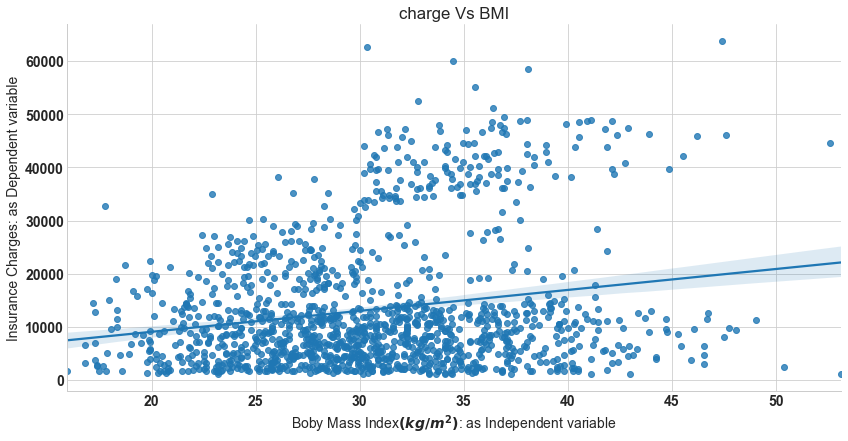

In [4]:
#for our visualization purpose will fit line using seaborn library only for bmi as independent variable 
#and charges as dependent variable
 
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6) 
# aspect is width by heigth ratio
# lmplot: linear model plot
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('charge Vs BMI')

**On top we have a scatter plot and regression line and the shaded portion is the confidence interval based on bootstrapping** 

**Exploratory Data Analysis**

In [5]:
df.describe()
#example of age-> 25 percentile means -> 25% of age is less than 27
# 50 percentile means -> 50% of the data is less than 39
# 75 percentile means -> 75% of the data is less than 51

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


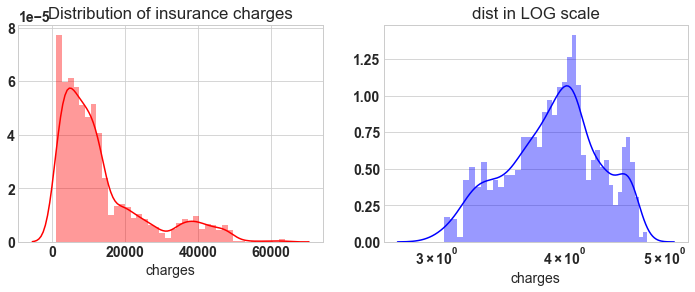

In [6]:
f = plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=40,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('dist in LOG scale')
ax.set_xscale('log')

**it looks like in the left plot, the charges varies from 1120 and 63500, the plot is right skewed 
in right plot, we applied natural log then plot tends to have normal distribution**

Text(0.5, 1.0, 'violin plot of charges vs smoking')

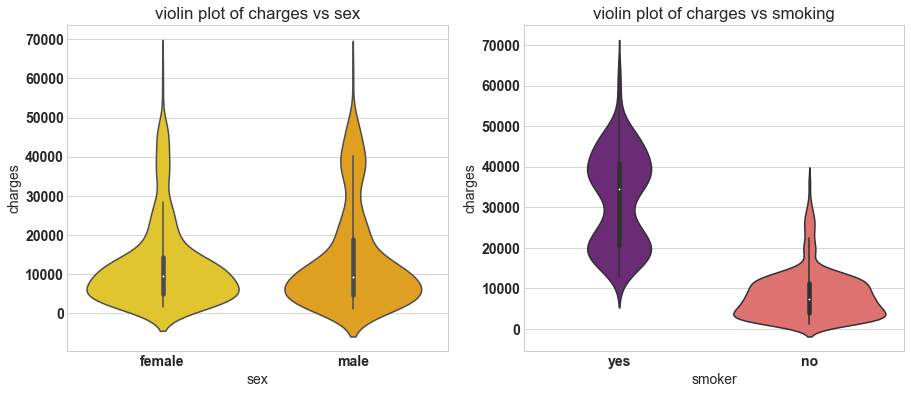

In [7]:
f=plt.figure(figsize=(15,6))
ax=f.add_subplot(121)
sns.violinplot(x='sex',y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('violin plot of charges vs sex')

ax=f.add_subplot(122)
sns.violinplot(x='smoker',y='charges',data=df,palette='magma',ax=ax)
ax.set_title('violin plot of charges vs smoking')

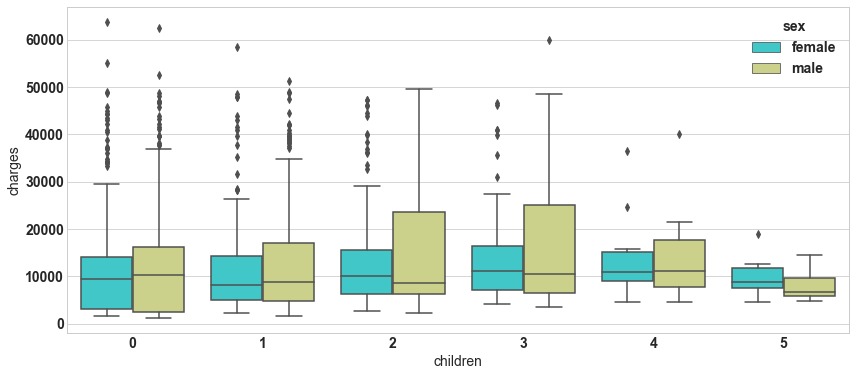

In [8]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children',y='charges',hue='sex',palette='rainbow',data=df)

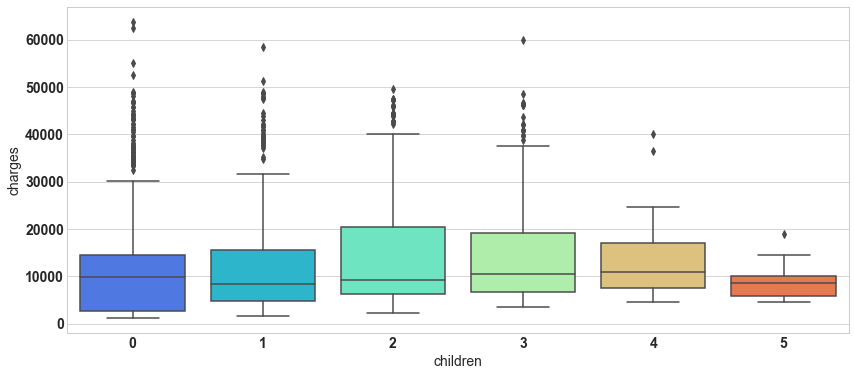

In [29]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children',y='charges',palette='rainbow',data=df)

In [37]:
df.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


In [ ]:
plt.figure(figsize=(14,6))
sns.